In [61]:
from orbit import Orbit, AU2km, mu, day2s
import elements as el
import angles as an
from lambert_izzo import lambert as lambert_izzo


import sys

import numpy as np
from numpy.linalg import norm
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('../gtoc4_problem_data.txt', skiprows=2,delimiter= '\s+',header=None)
df.columns = ['Name','Epoch','a','e','i','LAN','omega','M0']
df.head()

,Name,Epoch,a,e,i,LAN,omega,M0
0,'1580',54800.0,2.196803,0.487683,52.090794,62.324795,159.539839,3.521687
1,'1620',54800.0,1.245551,0.335511,13.337693,337.266017,276.806539,136.950031
2,'1943',54800.0,1.430317,0.255816,8.704065,246.401915,338.253875,288.405238
3,'2061',54800.0,2.264953,0.537119,3.770822,207.654108,156.432028,46.995497
4,'2135',54800.0,1.599572,0.503268,23.054312,191.262849,290.838892,256.724981


In [3]:
asteroids = set()

In [4]:
df.iloc[0]

Name       '1580'
Epoch       54800
a          2.1968
e        0.487683
i         52.0908
LAN       62.3248
omega      159.54
M0        3.52169
Name: 0, dtype: object

In [5]:
[*df.iloc[0]]

["'1580'",
 54800.0,
 2.1968033753931695,
 0.4876831067819973,
 52.09079390385544,
 62.32479511597435,
 159.53983855505257,
 3.5216868177911254]

In [6]:
for i in range(len(df)):
    o = Orbit(name=df.iloc[i].Name)
    o.from_gtoc(*df.iloc[i])
    asteroids.add(o)

In [7]:
print(o.details())

Orbit: '6344P-L'
 Epoch     : 54800.0
 a         :  2.80410817 AU
 e         :  0.66708346
 inc       :  4.72681220 deg
 LAN       :  183.61177196 deg
 argp      :  234.06965519 deg
 meanAnom0 :  79.37913845 deg
 trueAnom0 :  147.76999611 deg
 h         :  5560417068.38247395 km2/s
 r0        :  [-3.22550105 -1.53048387 0.10949722] AU
 v0        :  [-3.20094406 -12.99547743 1.05573793] km/s


In [8]:
asteroids;

In [9]:
for ast in asteroids:
    print("**  **  **")
    print(ast.details())

**  **  **
Orbit: '2003UB22'
 Epoch     : 54800.0
 a         :  1.21973303 AU
 e         :  0.22533070
 inc       :  15.85953520 deg
 LAN       :  212.46112458 deg
 argp      :  116.13344681 deg
 meanAnom0 :  323.45652508 deg
 trueAnom0 :  304.04107673 deg
 h         :  4796018520.12081814 km2/s
 r0        :  [0.02905455 -0.99838358 0.24374885] AU
 v0        :  [30.66614444 6.94803555 3.01051948] km/s
**  **  **
Orbit: '2007RQ12'
 Epoch     : 54800.0
 a         :  1.79262372 AU
 e         :  0.47323693
 inc       :  1.23963599 deg
 LAN       :  84.50261666 deg
 argp      :  222.25439640 deg
 meanAnom0 :  196.24914652 deg
 trueAnom0 :  186.62154437 deg
 h         :  5257171655.04633808 km2/s
 r0        :  [-1.80258618 1.90805419 0.04278241] AU
 v0        :  [-8.77514142 -10.18918391 0.16789034] km/s
**  **  **
Orbit: '2003UC5'
 Epoch     : 54800.0
 a         :  1.18534725 AU
 e         :  0.81828191
 inc       :  36.84295350 deg
 LAN       :  31.01446611 deg
 argp      :  210.59030156 d

 v0        :  [8.46580527 25.08147645 -2.33096779] km/s
**  **  **
Orbit: '2002WX12'
 Epoch     : 54800.0
 a         :  1.75039164 AU
 e         :  0.65955554
 inc       :  8.63453006 deg
 LAN       :  211.74316576 deg
 argp      :  328.29098053 deg
 meanAnom0 :  183.09261653 deg
 trueAnom0 :  180.84415538 deg
 h         :  4432515621.79312325 km2/s
 r0        :  [2.89503593 0.05887916 0.22368492] AU
 v0        :  [-0.39410727 10.10382790 -1.33626843] km/s
**  **  **
Orbit: '2006WN1'
 Epoch     : 54800.0
 a         :  2.09944330 AU
 e         :  0.45070598
 inc       :  4.01430827 deg
 LAN       :  239.43089765 deg
 argp      :  93.33874610 deg
 meanAnom0 :  286.71683204 deg
 trueAnom0 :  235.61284174 deg
 h         :  5765113199.36924744 km2/s
 r0        :  [-1.97202807 -1.06825803 -0.08103124] AU
 v0        :  [15.64963374 -11.00355864 1.33834260] km/s
**  **  **
Orbit: '2002XA'
 Epoch     : 54800.0
 a         :  2.82712589 AU
 e         :  0.62606123
 inc       :  3.31914560 deg
 LA

**  **  **
Orbit: '2008GP20'
 Epoch     : 54800.0
 a         :  1.95964890 AU
 e         :  0.44189229
 inc       :  32.64737505 deg
 LAN       :  31.62551178 deg
 argp      :  92.92788036 deg
 meanAnom0 :  113.51472305 deg
 trueAnom0 :  149.21099240 deg
 h         :  5597294836.46065998 km2/s
 r0        :  [-0.01929146 -2.23412676 -1.21233642] AU
 v0        :  [14.06754532 -2.82315121 -6.26624310] km/s
**  **  **
Orbit: '2008GQ3'
 Epoch     : 54800.0
 a         :  2.17855523 AU
 e         :  0.52288109
 inc       :  25.45058390 deg
 LAN       :  356.20471067 deg
 argp      :  142.11702020 deg
 meanAnom0 :  82.96430873 deg
 trueAnom0 :  137.87687642 deg
 h         :  5607822099.21794510 km2/s
 r0        :  [0.29555311 -2.32404114 -1.09431519] AU
 v0        :  [15.33534003 -6.13891772 -2.43211803] km/s
**  **  **
Orbit: '2008GV'
 Epoch     : 54800.0
 a         :  2.73047485 AU
 e         :  0.60927733
 inc       :  30.10145421 deg
 LAN       :  15.62644055 deg
 argp      :  177.60743060

 v0        :  [-26.83264436 -11.33938868 7.33417082] km/s
**  **  **
Orbit: '2003SK215'
 Epoch     : 54800.0
 a         :  1.85155154 AU
 e         :  0.44653056
 inc       :  36.01078545 deg
 LAN       :  2.85417092 deg
 argp      :  288.93376340 deg
 meanAnom0 :  46.91733934 deg
 trueAnom0 :  98.26879880 deg
 h         :  5426779323.60014057 km2/s
 r0        :  [1.37797698 0.65519910 0.42575621] AU
 v0        :  [-1.86796664 20.39236936 14.87100818] km/s
**  **  **
Orbit: '2003SM215'
 Epoch     : 54800.0
 a         :  2.10250883 AU
 e         :  0.56169860
 inc       :  4.98784062 deg
 LAN       :  5.89834287 deg
 argp      :  40.94228936 deg
 meanAnom0 :  240.44325763 deg
 trueAnom0 :  201.72931573 deg
 h         :  5347091062.22710133 km2/s
 r0        :  [-1.10058483 -2.79130992 -0.23245054] AU
 v0        :  [12.93390699 0.47119150 -0.07509476] km/s
**  **  **
Orbit: '2003SN214'
 Epoch     : 54800.0
 a         :  2.03614175 AU
 e         :  0.54906438
 inc       :  8.33254610 deg
 

Orbit: '2007HL4'
 Epoch     : 54800.0
 a         :  1.11852208 AU
 e         :  0.08970923
 inc       :  6.53035149 deg
 LAN       :  31.18720817 deg
 argp      :  138.53927777 deg
 meanAnom0 :  166.30181479 deg
 trueAnom0 :  168.49569131 deg
 h         :  4694953483.92597675 km2/s
 r0        :  [1.12637374 -0.44592527 -0.11043791] AU
 v0        :  [10.08587175 23.67049641 1.72015230] km/s
**  **  **
Orbit: '2007HW4'
 Epoch     : 54800.0
 a         :  1.48407370 AU
 e         :  0.76656558
 inc       :  1.23933283 deg
 LAN       :  138.88623888 deg
 argp      :  196.91227522 deg
 meanAnom0 :  291.24939542 deg
 trueAnom0 :  208.55167040 deg
 h         :  3486893554.77422333 km2/s
 r0        :  [-1.86790386 -0.14187409 0.02888418] AU
 v0        :  [14.84728006 -11.33943816 -0.02638733] km/s
**  **  **
Orbit: '2007JB21'
 Epoch     : 54800.0
 a         :  0.98666790 AU
 e         :  0.10927776
 inc       :  13.46197314 deg
 LAN       :  227.99390114 deg
 argp      :  250.84647741 deg
 mean

In [10]:
sys.getsizeof(asteroids)

131296

In [11]:
o.rv(epoch=55000)

(array([-4.86888672e+08, -4.23182566e+08,  3.23856856e+07]),
 array([ 2.22951025, -9.44366981,  0.79092257]))

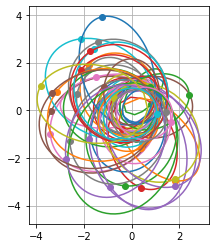

In [12]:
fig = plt.figure()
ax = plt.gca()
for i in range(50):
    o = asteroids.pop() #remove el
    asteroids.add(o) # place back into the set
    o.plot(num=50)

plt.grid()
ax.set_aspect(aspect=1)

In [13]:
len(asteroids)

1436

In [14]:
# create Earth
earth = Orbit(name='Earth')
earth.from_gtoc('Earth',54000,0.999988049532578, 1.671681163160e-2, 0.8854353079654e-3, 175.40647696473, 287.61577546182, 257.60683707535)
print(earth.details())

Orbit: Earth
 Epoch     : 54000
 a         :  0.99998805 AU
 e         :  0.01671681
 inc       :  0.00088544 deg
 LAN       :  175.40647696 deg
 argp      :  287.61577546 deg
 meanAnom0 :  257.60683708 deg
 trueAnom0 :  255.74455168 deg
 h         :  4456566001.94500351 km2/s
 r0        :  [1.00360834 -0.02160433 -0.00000091] AU
 v0        :  [0.15588657 29.66001209 -0.00045708] km/s


In [15]:
o=asteroids.pop()
asteroids.add(o)
print(o.details())

Orbit: '2003YD45'
 Epoch     : 54800.0
 a         :  2.48924606 AU
 e         :  0.69564393
 inc       :  8.40494037 deg
 LAN       :  252.85166236 deg
 argp      :  104.29944332 deg
 meanAnom0 :  108.26282138 deg
 trueAnom0 :  160.55747077 deg
 h         :  5051912911.46611595 km2/s
 r0        :  [-3.41694074 1.40466204 -0.54362102] AU
 v0        :  [-8.98581120 -6.07646163 -1.00395555] km/s


In [16]:
# for each launch
launch_step = 10
earliest_launch_date = 57023
latest_launch_date = 61041+10
earliest_launch_date = 58500
latest_launch_date = 59000

launch_dates = np.arange(earliest_launch_date, latest_launch_date, step=launch_step) # in MJD

launch_dates

array([58500, 58510, 58520, 58530, 58540, 58550, 58560, 58570, 58580,
       58590, 58600, 58610, 58620, 58630, 58640, 58650, 58660, 58670,
       58680, 58690, 58700, 58710, 58720, 58730, 58740, 58750, 58760,
       58770, 58780, 58790, 58800, 58810, 58820, 58830, 58840, 58850,
       58860, 58870, 58880, 58890, 58900, 58910, 58920, 58930, 58940,
       58950, 58960, 58970, 58980, 58990])

In [17]:
# test lambert for one asteroid at initial time
r_earth, v_earth = earth.rv(epoch = earliest_launch_date)
r_ast, v_ast = o.rv(epoch=earliest_launch_date+60)

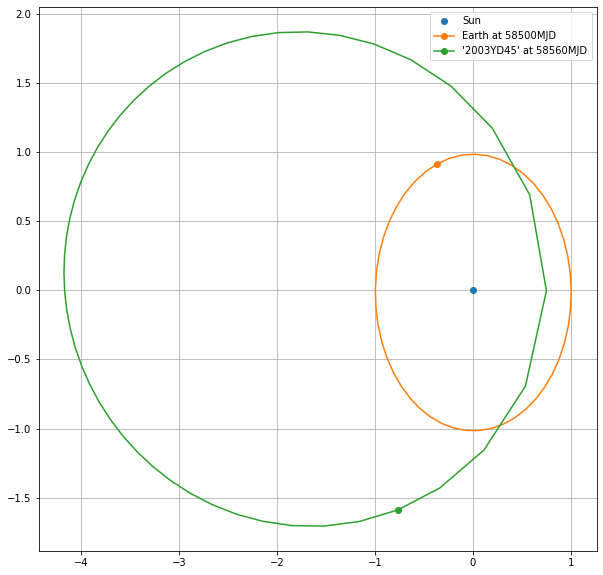

In [34]:

fig = plt.figure(figsize=(10,10))
plt.plot(0,0,'o',label='Sun')
earth.plot(start=earliest_launch_date)
o.plot(start=earliest_launch_date + 60)
plt.legend()
plt.grid()

In [19]:
norm(r_earth)/AU2km

0.9834603057830545

In [20]:

v1, v2 = lambert_izzo(o.mu, r_earth, r_ast,tof=60*day2s, M=0, return_='short')

In [21]:
v1, v2

(array([-30.70624431, -66.46043155,  -1.60015249]),
 array([  0.26727419, -67.55262993,  -0.74642452]))

In [22]:
o_trx = Orbit(name='trx1')

In [23]:
o_trx.from_rv(earliest_launch_date, r_earth, v1)

In [24]:
earliest_launch_date

58500

In [25]:
o_trx.__dict__

{'name': 'trx1',
 'mu': 132712440018.0,
 'epoch0': 58500,
 'r0': array([-5.46446833e+07,  1.36704976e+08, -2.03819016e+03]),
 'v0': array([-30.70624431, -66.46043155,  -1.60015249]),
 'h': 7832952034.34645,
 'e': 3.660597224999175,
 'LAN': 5.092200159527596,
 'inc': 0.030092826265430004,
 'argp': 4.088366600072259,
 'trueAnom0': 5.336871484636981,
 'meanAnom0': -2.5140376738640215,
 'a': -37283664.74411445}

In [26]:
o_trx.trueAnom0

5.336871484636981

In [27]:
o_trx.e

3.660597224999175

In [28]:
print(o_trx.details())

Orbit: trx1
 Epoch     : 58500
 a         :  -0.24905942 AU
 e         :  3.66059722
 inc       :  1.72419194 deg
 LAN       :  291.76157758 deg
 argp      :  234.24615129 deg
 meanAnom0 :  -144.04374825 deg
 trueAnom0 :  305.78021187 deg
 h         :  7832952034.34644985 km2/s
 r0        :  [-0.36503314 0.91320588 -0.00001362] AU
 v0        :  [-30.70624431 -66.46043155 -1.60015249] km/s


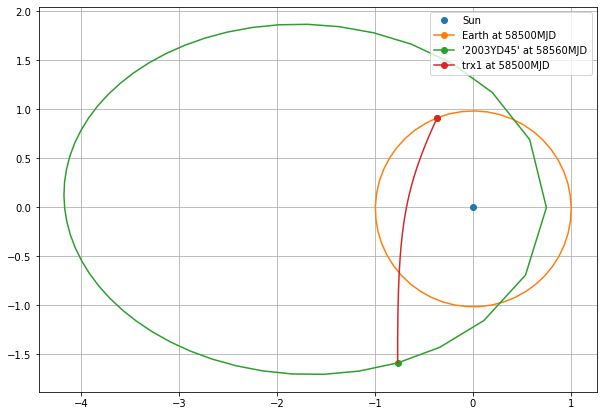

In [42]:
fig = plt.figure(figsize=(10,10))
plt.plot(0,0,'o',label='Sun')
earth.plot(start=earliest_launch_date)
o.plot(start=earliest_launch_date+60)
o_trx.plot(earliest_launch_date, earliest_launch_date + 60)
plt.legend()
plt.grid()
ax = plt.gca()
ax.set_aspect(1)

In [37]:
dv1=v1-v_earth
print(dv1)
print(norm(dv1))

[ -2.56945144 -55.29509264  -1.60035931]
55.37788819197388


In [38]:
dv2=v2-v_ast
print(dv2)
print(norm(dv2))

[-24.05452425 -74.40288805  -3.88190759]
78.29098986386063


In [47]:
# for each launch
launch_step = 10
earliest_launch_date = 57023
latest_launch_date = 61041+10
earliest_launch_date = 58500
latest_launch_date = 59000

launch_dates = np.arange(earliest_launch_date, latest_launch_date, step=launch_step) # in MJD

launch_dates = np.arange(58676-50, 58676+50, step=launch_step) # in MJD

print(launch_dates)

tof_vals = np.arange(20,65,5)
print(tof_vals)

[58626 58636 58646 58656 58666 58676 58686 58696 58706 58716]
[20 25 30 35 40 45 50 55 60]


['2003UB22',
 '2007RQ12',
 '2003UC5',
 '2007RR12',
 '2003UC20',
 '2007RT9',
 '2003UE22',
 '2007RU19',
 '2003UO25',
 '2007RX8',
 '2003UP12',
 '2007RY9',
 '2003UP24',
 '2007RZ8',
 '2003UQ25',
 '2007SU1',
 '2003UR12',
 '2007SV11',
 '2003UX26',
 '2007TB14',
 '2003UX34',
 '2007TC14',
 '2003VE1',
 '2007TD71',
 '2003VG1',
 '2007TE66',
 '2003WB25',
 '2007TG15',
 '2003WE157',
 '2007TG71',
 '2003WL25',
 '2007TH71',
 '2003WO151',
 '2007TK15',
 '2003WP7',
 '2007TL15',
 '2003WP25',
 '2007TS68',
 '2003WR21',
 '2007TX18',
 '2003WU21',
 '2007TX24',
 '2003WX25',
 '2007TY18',
 '2003WY153',
 '2007TY24',
 '2003XJ7',
 '2007UH',
 '2003XK',
 '2007UJ',
 '2003YD45',
 '2007US',
 '2003YG118',
 '2007US3',
 '2003YG136',
 '2007US6',
 '2007US12',
 '2003YH111',
 '2007US51',
 '2003YH136',
 '2007US65',
 '2003YL',
 '2003YM1',
 '2007VA3',
 '2007VA188',
 '2003YO1',
 '2003YP3',
 '2007VB138',
 '2007VD3',
 '2003YP94',
 '2007VD8',
 '2003YQ94',
 '2007VD184',
 '2003YT70',
 '2007VE138',
 '2003YT124',
 '2007VF191',
 '2003YW1',
 '

In [52]:
type(earth)

orbit.Orbit

In [68]:

vinf_max = 4.1

assert len(asteroids) == 1436, "check number of asteroids"
    
ind = 0
for ld in launch_dates:
    for tof in tof_vals:
        for ast in asteroids:

            re, ve = earth.rv(epoch=ld)
            ra, va = ast.rv(epoch=ld+tof)
            try:
                v1, v2 = lambert_izzo(earth.mu, re, ra,tof=tof*day2s,M=0, return_='short')
            except:
                pass
             
            vinf = norm(v1-ve)
            
            if vinf<vinf_max:
                
                print(f'{ind}: date: {ld}, tof: {tof}, ast: {ast}, \t vinf: {vinf:3.2e}')
                ind += 1



0: date: 58626, tof: 20, ast: '2003LH', 	 vinf: 4.07e+00
1: date: 58626, tof: 55, ast: '2005NE21', 	 vinf: 3.97e+00
2: date: 58626, tof: 55, ast: '2006WP127', 	 vinf: 3.69e+00
3: date: 58636, tof: 55, ast: '141593', 	 vinf: 4.07e+00
4: date: 58636, tof: 60, ast: '2000QW7', 	 vinf: 4.02e+00
5: date: 58636, tof: 60, ast: '141593', 	 vinf: 3.09e+00
6: date: 58646, tof: 50, ast: '141593', 	 vinf: 3.52e+00
7: date: 58646, tof: 55, ast: '2000QW7', 	 vinf: 4.00e+00
8: date: 58646, tof: 55, ast: '141593', 	 vinf: 2.53e+00
9: date: 58646, tof: 55, ast: '2006QV89', 	 vinf: 3.78e+00
10: date: 58646, tof: 60, ast: '2000QW7', 	 vinf: 3.13e+00
11: date: 58646, tof: 60, ast: '2008SJ82', 	 vinf: 3.14e+00
12: date: 58646, tof: 60, ast: '136818', 	 vinf: 3.14e+00
13: date: 58646, tof: 60, ast: '141593', 	 vinf: 1.79e+00
14: date: 58656, tof: 45, ast: '141593', 	 vinf: 3.00e+00
15: date: 58656, tof: 50, ast: '2002JR100', 	 vinf: 4.10e+00
16: date: 58656, tof: 50, ast: '2008SJ82', 	 vinf: 4.07e+00
17: dat

138: date: 58696, tof: 30, ast: '2008SJ82', 	 vinf: 3.91e+00
139: date: 58696, tof: 30, ast: '2006QV89', 	 vinf: 3.10e+00
140: date: 58696, tof: 35, ast: '2007RQ12', 	 vinf: 3.36e+00
141: date: 58696, tof: 35, ast: '2003YG136', 	 vinf: 3.48e+00
142: date: 58696, tof: 35, ast: '2002JR100', 	 vinf: 2.87e+00
143: date: 58696, tof: 35, ast: '2000QW7', 	 vinf: 2.25e+00
144: date: 58696, tof: 35, ast: '2008SJ82', 	 vinf: 3.49e+00
145: date: 58696, tof: 35, ast: '2006QV89', 	 vinf: 2.11e+00
146: date: 58696, tof: 40, ast: '2003YG136', 	 vinf: 3.86e+00
147: date: 58696, tof: 40, ast: '2000QW7', 	 vinf: 1.40e+00
148: date: 58696, tof: 40, ast: '2008SJ82', 	 vinf: 3.61e+00
149: date: 58696, tof: 40, ast: '2006QV89', 	 vinf: 1.47e+00
150: date: 58696, tof: 45, ast: '2002JR100', 	 vinf: 2.94e+00
151: date: 58696, tof: 45, ast: '2004SA20', 	 vinf: 3.55e+00
152: date: 58696, tof: 45, ast: '2000QW7', 	 vinf: 1.06e+00
153: date: 58696, tof: 45, ast: '2008SJ82', 	 vinf: 3.97e+00
154: date: 58696, tof: 

In [70]:
sys.getsizeof(asteroids)

131296